In [1]:
from gensim.models import FastText
model = FastText.load('fasttext_3.model')

In [9]:
import numpy as np

In [203]:
import pandas as pd
df = pd.read_csv("0_keyword_final_21.csv", encoding = "euc kr")

In [204]:
import re
def compile(x):
    return re.compile('[가-힣]+').findall(x)

df['token']= df['token'].apply(compile)

In [124]:
def cut(x):
    if len(x) >= 10:
        return x[:10]
    else:
        while(len(x) < 10):
            x.append('  ')
        return x

In [205]:
df['token'] = df['token'].apply(cut)

In [197]:
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(model.wv[i])
        except KeyError as e:
            pass
    try:
        return np.mean(vector, axis =0)
    except IndexError as e:
        pass

In [206]:
df['wv'] = df['token'].map(get_sentence_mean_vector)

In [207]:
df1 = df[['isbn', 'title', 'wv']]

In [208]:
result = pd.concat([result, df1])

In [209]:
result.reset_index(drop = True, inplace = True)

In [210]:
result

,isbn,title,wv
0,9791157921591,"달려라, 달구!","[-0.011496747, 0.27368778, -0.054224867, 0.975..."
1,9791157921706,문학나눔 시리즈 세트(1-25권)(전25권),"[0.13189957, 0.59643984, -0.19247475, 0.515157..."
2,9791157921737,우리 집 물건 괴물(아이앤북 창작동화 60),"[-0.0051579354, 0.20870905, -0.15918821, 0.633..."
3,9791157921744,사람을 훔쳐가는 도둑(아이앤북 문학나눔 17),"[-0.074331425, 0.06238479, 0.17898168, 0.60035..."
4,9791157921751,개성빵(아이앤북 문학나눔 5),"[-0.7543176, -0.25368914, -0.0027504326, 0.830..."
...,...,...,...
527323,3902000200183,(사은품)파고다 고득점 비법서,"[-0.22065456, -0.13598207, 0.14999071, 0.02133..."
527324,3902000200190,(사은품)(파고다)Grammar Chat 복습북,"[-0.33845997, -0.08646694, 0.19570623, 0.07949..."
527325,3902000200206,(사은품)[웅진주니어] 도토리 판퍼즐 ver.1,"[0.36563286, 0.19066921, 0.17566085, 0.5196424..."
527326,3902000200213,(사은품)[웅진주니어] 도토리 판퍼즐 ver.2,"[0.36563286, 0.19066921, 0.17566085, 0.5196424..."


In [211]:
result = pd.concat([df2, result])
result.reset_index(drop = True, inplace = True)
result

,isbn,title,wv,label
0,2000151036468,성경(46판 2단 금장색인) (BB6 BH) (250130),"[-0.3060102, 0.7355291, 0.13594207, 0.78480816...",9.0
1,2000127000059,남북전육부 율장비교연구(3판),"[-0.13365057, -0.35027412, 0.0052550314, 1.491...",12.0
2,2000107000024,제7감각을 기르자,"[0.11440563, -0.0695975, -0.0038120127, -0.021...",8.0
3,2000156000150,디오니소스의 노동 1,"[-0.7760841, -0.63411933, -0.05859419, 0.32841...",9.0
4,2000156000198,아침햇살이 그립다,"[0.05215635, 0.046679758, 0.27986166, -0.08967...",8.0
...,...,...,...,...
1027324,3902000200183,(사은품)파고다 고득점 비법서,"[-0.22065456, -0.13598207, 0.14999071, 0.02133...",NaN
1027325,3902000200190,(사은품)(파고다)Grammar Chat 복습북,"[-0.33845997, -0.08646694, 0.19570623, 0.07949...",NaN
1027326,3902000200206,(사은품)[웅진주니어] 도토리 판퍼즐 ver.1,"[0.36563286, 0.19066921, 0.17566085, 0.5196424...",NaN
1027327,3902000200213,(사은품)[웅진주니어] 도토리 판퍼즐 ver.2,"[0.36563286, 0.19066921, 0.17566085, 0.5196424...",NaN


In [115]:
# 최적의 K 찾기 : 군집 갯수 k 찾기
from sklearn import metrics
from scipy.spatial.distance import cdist
from tqdm import tqdm
from sklearn.cluster import KMeans
import time

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)
tqdm.pandas()

word_vectors = result.wv.to_list()

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(word_vectors)
    k_means.fit(word_vectors)
    distortions.append(sum(np.min(cdist(word_vectors, k_means.cluster_centers_, 'euclidean'), axis=1)) / len(word_vectors))
    
    print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (48,) and (24,)

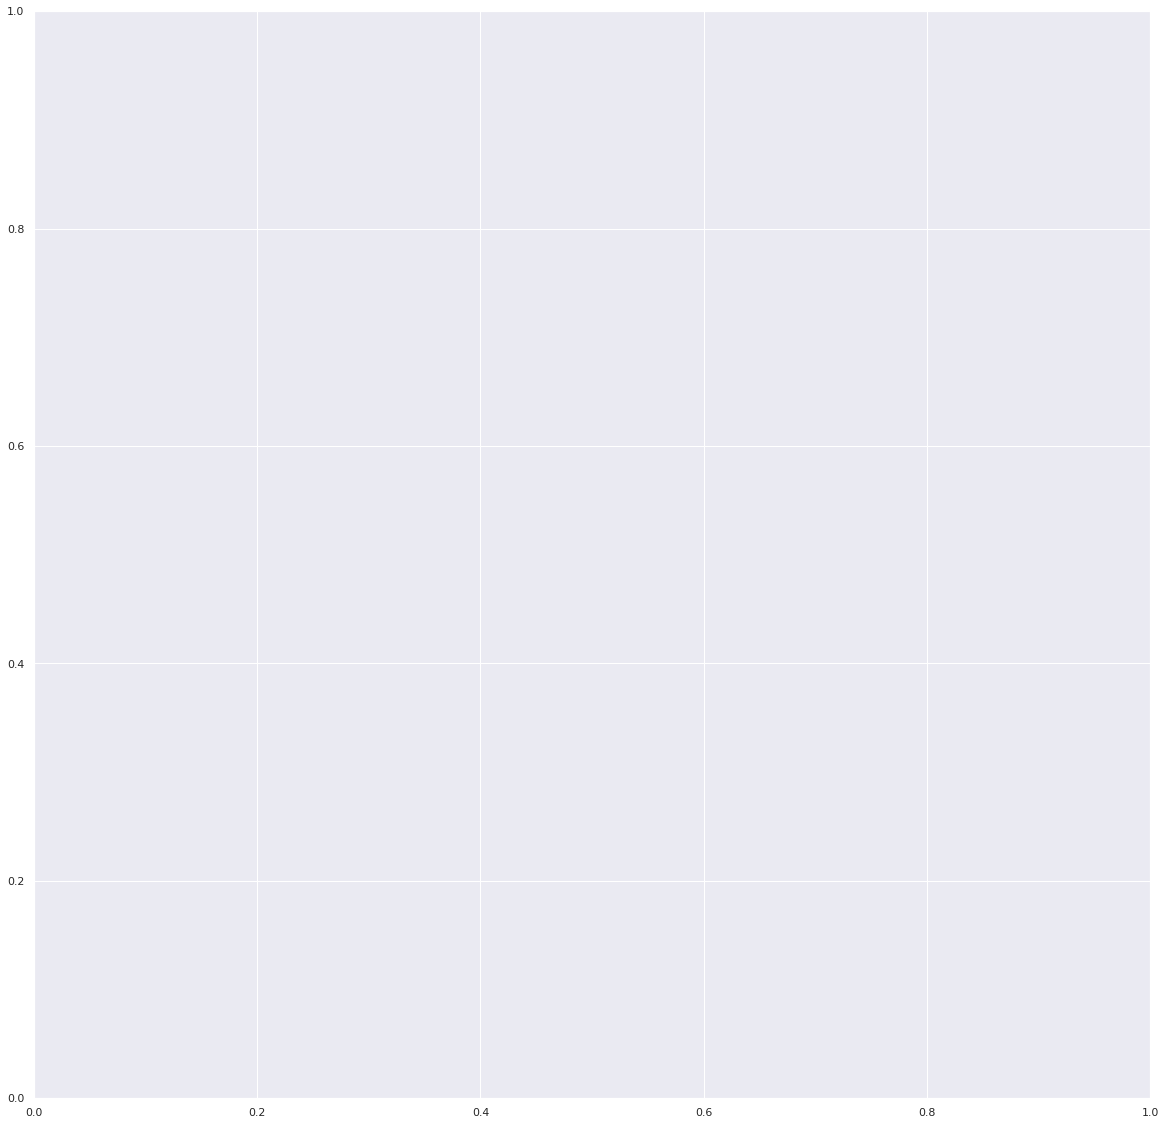

In [116]:
import matplotlib.pyplot as plt
# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()

In [212]:
from sklearn.cluster import KMeans
import time

word_vectors = result.wv.to_list()
num_clusters = 20

kmeans_clustering = KMeans(n_clusters = num_clusters)

x = kmeans_clustering.fit_predict(word_vectors)
result['label'] = x

In [109]:
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns

In [218]:
# tsne
tsne = TSNE(verbose=1, perplexity=100, random_state=2021)     # perplexity : 유사정도
X_embedded = tsne.fit_transform(word_vectors)
print('Embedding shape 확인', X_embedded.shape)

# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
palette = sns.hls_palette(15, l=.4, s=.9) 
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue= x,
                legend='full',palette=palette)     # kmeans로 예측

plt.title('t-SNE with KMeans Labels Embedding')
plt.savefig("t-sne embedding.png")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1027329 samples in 0.053s...


KeyboardInterrupt: 

In [216]:
result['label']

0           7
1          14
2           3
3          15
4           3
           ..
1027324     3
1027325     5
1027326    12
1027327    12
1027328     3
Name: label, Length: 1027329, dtype: int32

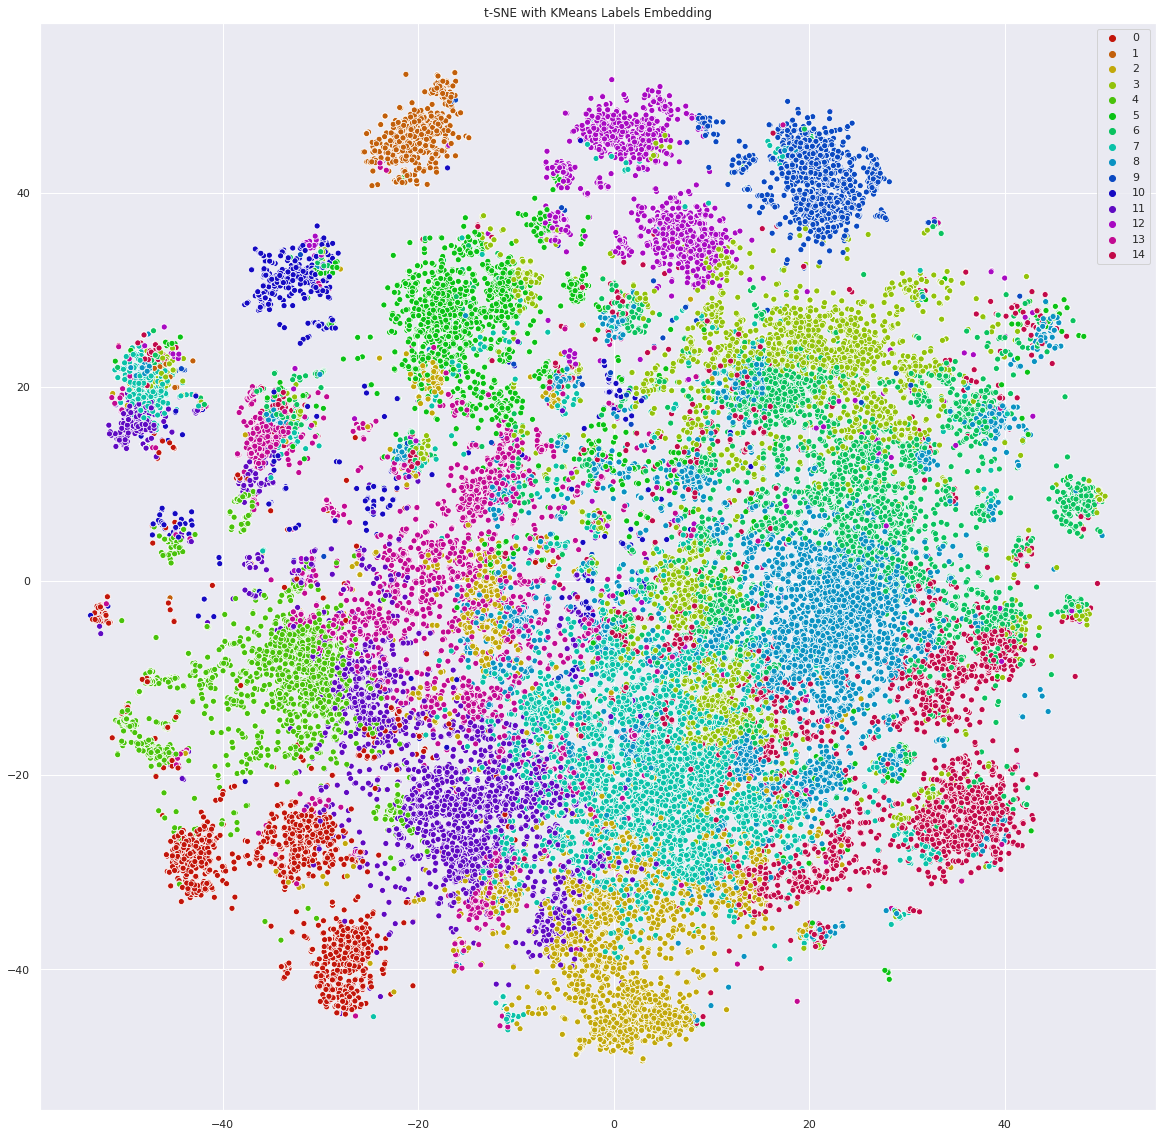

In [114]:

# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
palette = sns.hls_palette(15, l=.4, s=.9) 
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue= x,
                legend='full',palette=palette)     # kmeans로 예측

plt.title('t-SNE with KMeans Labels Embedding')
plt.savefig("t-sne embedding.png")
plt.show()

In [121]:
df2 = result

In [217]:
result.to_csv("all.csv", encoding = "euc kr")